In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src/')
from random_graph import RandGraph
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reward

In [3]:
def reward(g):
    return np.mean([(len(v.path)-1)/float(v.travel_time) for v in g.moving_actors.values()])

In [4]:
g = RandGraph(actors=1000)

In [5]:
total_reward = []
for i in range(200):
    congest, r = g.action(0,0)
    f = 1 - np.mean(congest)
    total_reward.append(reward(g)*f)

c:\users\girardotm\appdata\local\continuum\anaconda2\envs\graph_ml_problems\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\girardotm\appdata\local\continuum\anaconda2\envs\graph_ml_problems\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


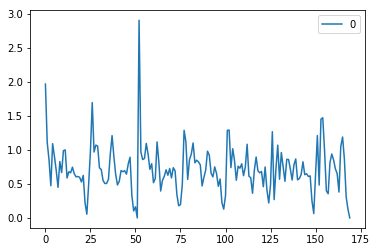

In [6]:
pd.DataFrame(total_reward).plot()
plt.show()

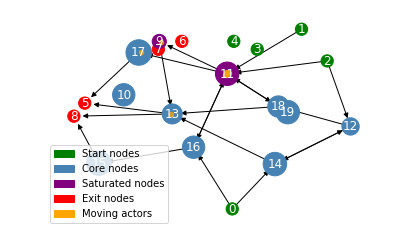

In [81]:
g.plot()

### Current reward

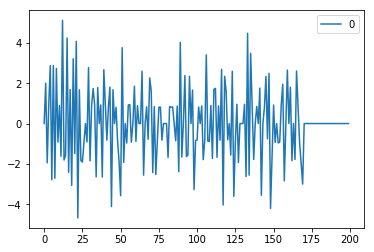

In [120]:
g = RandGraph(actors=1000)
total_reward = []
for i in range(200):
    congest, r = g.action(0,0)
#     f = 1 - np.mean(congest)
    total_reward.append(r)
pd.DataFrame(total_reward).plot()
plt.show()

In [121]:
np.sum(total_reward)

-0.31493506493506462

### Fluidity

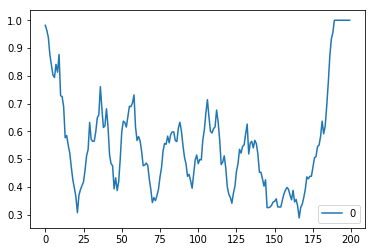

In [89]:
g = RandGraph(actors=1000)
total_reward = []
for i in range(200):
    congest, r = g.action(0,0)
    f = 1 - np.mean(congest)
    total_reward.append(f)
pd.DataFrame(total_reward).plot()
plt.show()

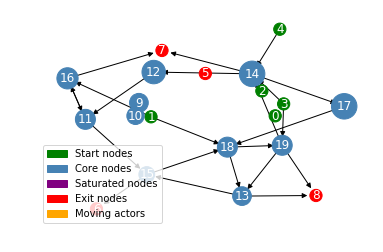

In [90]:
g.plot()

### Individual reward for output actor and punishment for network actor

In [65]:
def reward_or_punishment(g):
    r = 0
    for v in g.moving_actors.values():
        if len(v.path) == 1:
            r += 1
        else:
            r -= 1
    return r

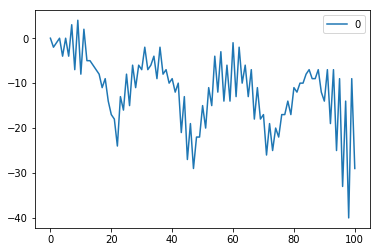

In [97]:
g = RandGraph(actors=1000)
total_reward = [0]
for i in range(100):
    g.action(0,0)
    total_reward.append( reward_or_punishment(g) - total_reward[-1])
pd.DataFrame(total_reward).plot()
plt.show()

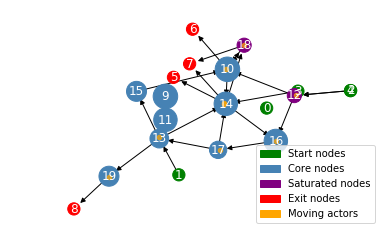

In [96]:
g.plot()

### Combine fludity

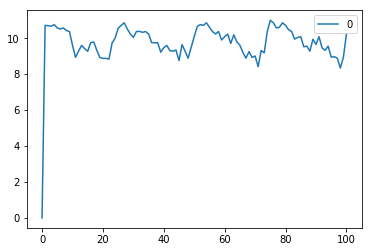

In [130]:
g = RandGraph(actors=1000)
total_reward = [0]
for i in range(100):
    g.action(0,0)
    vals = g.get_loading()
    fluidity = len(g.core_nodes) - np.sum(vals)
    total_reward.append( fluidity)
pd.DataFrame(total_reward).plot()
plt.show()

### Individual reward for fluid road and punishment for congested road

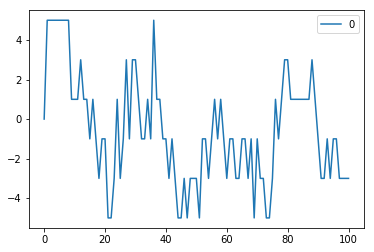

In [217]:
g = RandGraph(actors=1000, graph_type='medium')
total_reward = [0]
for i in range(100):
    congest,r = g.action(0,0)
    vals = np.where(congest < 0.8, 1,-1)
    total_reward.append( np.sum(vals))
pd.DataFrame(total_reward).plot()
plt.show()

In [218]:
np.sum(total_reward)

-56

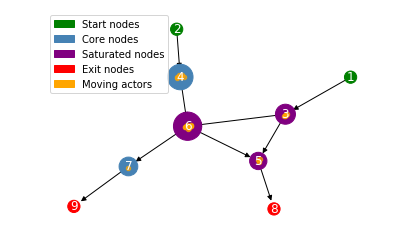

In [219]:
g.plot()

### random actions

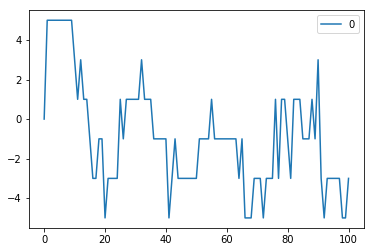

In [206]:
g = RandGraph(actors=1000, graph_type='medium')
total_reward = [0]
for i in range(100):
    act = np.random.choice(len(g.controllable_intersections))
    val = np.random.randn()
    congest,r = g.action(act,val)
    vals = np.where(congest < 0.8, 1,-1)
    total_reward.append( np.sum(vals))
pd.DataFrame(total_reward).plot()
plt.show()

In [207]:
np.sum(total_reward)

-86

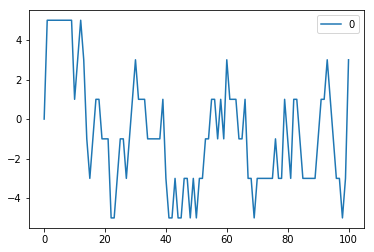

In [208]:
g = RandGraph(actors=1000, graph_type='medium')
total_reward = [0]
for i in range(100):
    congest,r = g.action(1,-0.1)
    vals = np.where(congest < 0.8, 1,-1)
    total_reward.append( np.sum(vals))
pd.DataFrame(total_reward).plot()
plt.show()

In [209]:
np.sum(total_reward)

-72

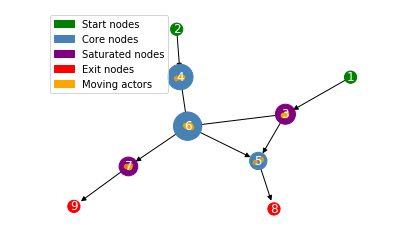

In [199]:
g.plot()

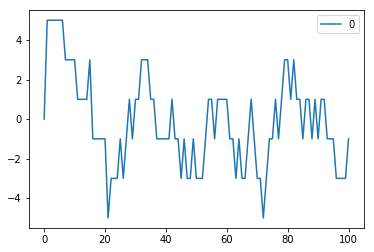

In [246]:
g = RandGraph(actors=1000, graph_type='medium')
total_reward = [0]
for i in range(100):
    congest,r = g.action(1,-0.1)
    total_reward.append(r)
pd.DataFrame(total_reward).plot()
plt.show()

In [247]:
np.sum(total_reward)

-14

### continuous reward and penalty

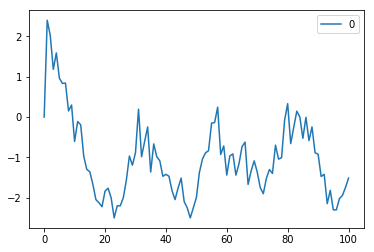

In [248]:
g = RandGraph(actors=1000, graph_type='medium')
total_reward = [0]
for i in range(100):
    congest,r = g.action(0,0)
    val = np.sum(0.5 - congest)
    total_reward.append(val)
pd.DataFrame(total_reward).plot()
plt.show()

In [249]:
np.sum(total_reward)

-101.25384615384614

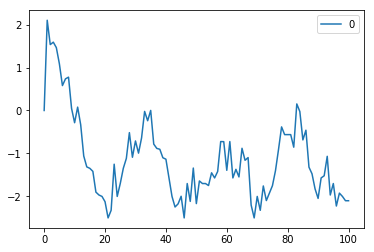

In [250]:
g = RandGraph(actors=1000, graph_type='medium')
total_reward = [0]
for i in range(100):
    congest,r = g.action(0,0, continuous=True)
    total_reward.append(r)
pd.DataFrame(total_reward).plot()
plt.show()

In [251]:
np.sum(total_reward)

-114.81923076923076